In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

root_folder = exp_path = Path().absolute().parent / "experiments" 

# Get latest generated folder
subfolder_list = [f for f in root_folder.iterdir()]
subfolder_list_creation_time = [f.stat().st_ctime for f in subfolder_list]
latest_subfolder_idx =  subfolder_list_creation_time.index(max(subfolder_list_creation_time))
experiment_path = subfolder_list[latest_subfolder_idx]

experiment_path = root_folder / "patience_2020-07-07_15h41"
# Read CSV results
df = pd.read_csv(experiment_path / "results.csv")


In [52]:
# Config file
with open(experiment_path / "config.yml") as f:
     print(f.read())

experiment_name: patience
n_repeats: 10
scenario_params_list:
 - partners_count: 
     - 10
   amounts_per_partner: 
     - [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   samples_split_option: 
     - ['basic', 'stratified']
   multi_partner_learning_approach:
     - 'fedavg'
     - 'seq-pure'
     - 'seq-with-final-agg'
     - 'seqavg'
   aggregation_weighting: 
     - 'uniform' 
   gradient_updates_per_pass_count: 
     - 4
     - 8
     - 16
   epoch_count: 
     - 100
   minibatch_count: 
     - 1
     - 2
     - 5
     - 10



In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
aggregation_weighting              36 non-null object
dataset_fraction_per_partner       36 non-null object
dataset_name                       36 non-null object
epoch_count                        36 non-null float64
final_relative_nb_samples          36 non-null object
gradient_updates_per_pass_count    36 non-null float64
is_early_stopping                  36 non-null float64
learning_computation_time_sec      36 non-null float64
minibatch_count                    36 non-null float64
mpl_nb_epochs_done                 36 non-null float64
mpl_test_score                     36 non-null float64
multi_partner_learning_approach    36 non-null object
nb_samples_used                    36 non-null float64
partners_count                     36 non-null float64
samples_split_description          36 non-null object
scenario_name                      36 non-null object
short_scenario_name     

In [54]:
scenario_ids = df.scenario_id.unique()
random_states = df.random_state.unique()
samples_split_descriptions = df.samples_split_description.unique()
dataset_fraction_per_partner_list = df.dataset_fraction_per_partner.unique()

print('Random state', random_states)
print('Scenario id', scenario_ids)
print('amounts_per_partner', amounts_per_partner_list)
print()

df.info()


Random state [0]
Scenario id [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
amounts_per_partner ['[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
aggregation_weighting              36 non-null object
dataset_fraction_per_partner       36 non-null object
dataset_name                       36 non-null object
epoch_count                        36 non-null float64
final_relative_nb_samples          36 non-null object
gradient_updates_per_pass_count    36 non-null float64
is_early_stopping                  36 non-null float64
learning_computation_time_sec      36 non-null float64
minibatch_count                    36 non-null float64
mpl_nb_epochs_done                 36 non-null float64
mpl_test_score                     36 non-null float64
multi_partner_learning_approach    36 non-null object
nb_samples_used           

In [55]:
df["computation_time_minutes"] = df.learning_computation_time_sec / 60
df.short_scenario_name = df.samples_split_description + df.dataset_fraction_per_partner + ' mb ' + df.minibatch_count.astype(str)
df.short_scenario_name.unique()
#df.contributivity_method = df.contributivity_method.str.replace('values', '')

array(['stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 1.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 2.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 5.0',
       'stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1] mb 10.0'],
      dtype=object)

In [56]:
# Helper function for plot
def get_x_tick_amount(df, scenario_id, partners_ids):
    
    x_ticks = []
    for partner_id in partners_ids:
        current_df = df[(df.scenario_id == scenario_id) & (df.partner_id == partner_id)]
        amount = current_df.amount_per_partner.unique()

        assert(len(amount) == 1)
        amount = amount[0]
    
        x_ticks.append('partner_' + str(partner_id) + ' ' + str(amount))
    return x_ticks

################################################
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


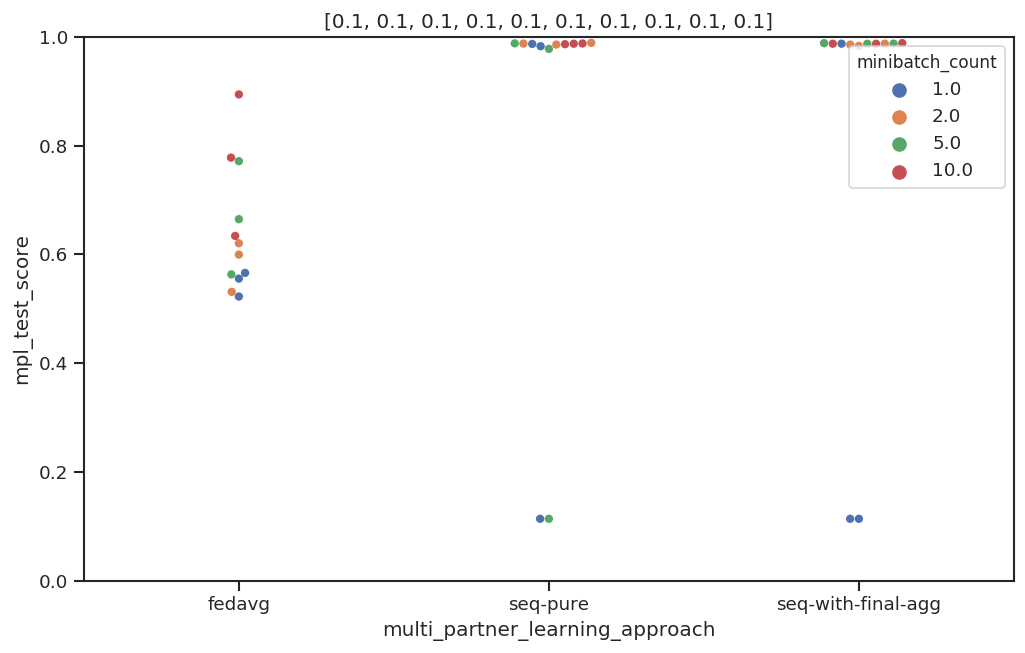

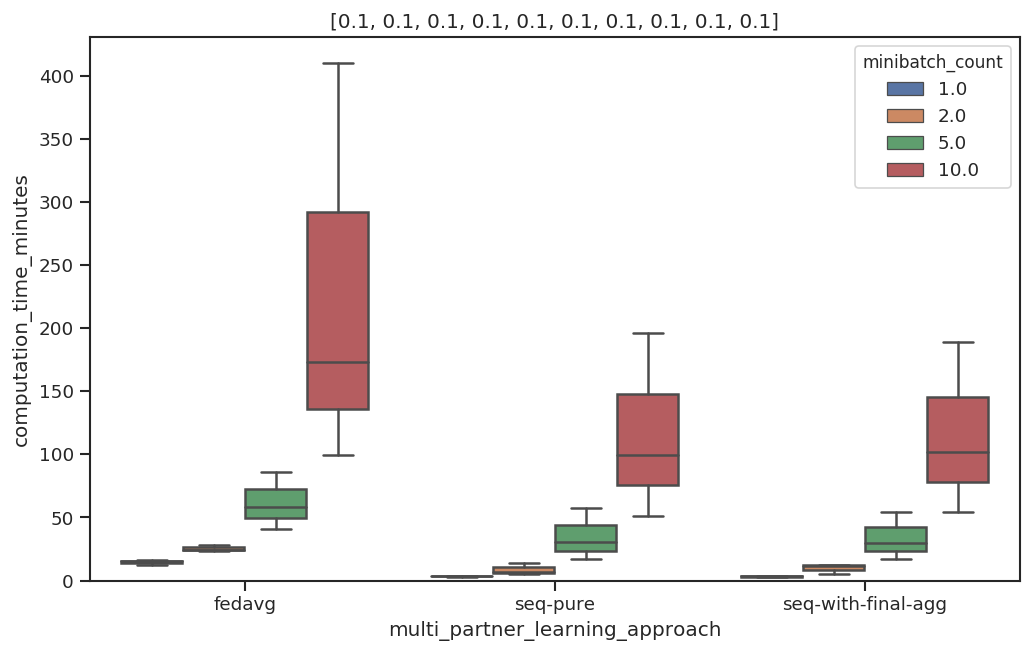

In [57]:
# Plot loop
for dataset_fraction_per_partner in dataset_fraction_per_partner_list:
    
    current_df = df[df.dataset_fraction_per_partner == dataset_fraction_per_partner]

    sns.set(style="ticks")
    #current_df.info()
    print("################################################")
    print(amounts_per_partner)

    plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    ax = sns.swarmplot(x="multi_partner_learning_approach", y="mpl_test_score", hue="minibatch_count",
                       data=current_df)
    plt.ylim([0, 1])

        
    ax = plt.figure(figsize=(10, 6), dpi=120)
    plt.title(amounts_per_partner)
    sns.boxplot(x="multi_partner_learning_approach", y="computation_time_minutes", hue="minibatch_count",
                     data=current_df)
    plt.ylim(bottom=0)

    
    plt.show()
    

## Losses

In [58]:
df_seq = df[(df.multi_partner_learning_approach == "seq-pure") & (df.minibatch_count == 1)]
df_seq.head(20)


,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
12,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",4.0,1.0,185.384671,1.0,82.0,...,38879.0,10.0,stratified,scenario_13_repeat_1_2020-07-08_08h09_ce4,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,12,3.089745
16,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",8.0,1.0,198.652460,1.0,66.0,...,38879.0,10.0,stratified,scenario_17_repeat_1_2020-07-08_09h26_cf3,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,16,3.310874
20,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",16.0,1.0,211.645967,1.0,40.0,...,38879.0,10.0,stratified,scenario_21_repeat_1_2020-07-08_11h47_47c,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,20,3.527433


In [59]:
pd.set_option('display.max_seq_items', 40)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 30)
pd.set_option('display.width', None)


print(len(df_seq.scenario_name.unique()))
df_seq

3


,aggregation_weighting,dataset_fraction_per_partner,dataset_name,epoch_count,final_relative_nb_samples,gradient_updates_per_pass_count,is_early_stopping,learning_computation_time_sec,minibatch_count,mpl_nb_epochs_done,...,nb_samples_used,partners_count,samples_split_description,scenario_name,short_scenario_name,test_data_samples_count,train_data_samples_count,random_state,scenario_id,computation_time_minutes
12,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",4.0,1.0,185.384671,1.0,82.0,...,38879.0,10.0,stratified,scenario_13_repeat_1_2020-07-08_08h09_ce4,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,12,3.089745
16,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",8.0,1.0,198.652460,1.0,66.0,...,38879.0,10.0,stratified,scenario_17_repeat_1_2020-07-08_09h26_cf3,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,16,3.310874
20,uniform,"[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",mnist,100.0,"[0.10000257208261529, 0.10000257208261529, 0.1...",16.0,1.0,211.645967,1.0,40.0,...,38879.0,10.0,stratified,scenario_21_repeat_1_2020-07-08_11h47_47c,"stratified[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...",10000.0,48000.0,0,20,3.527433


In [60]:
scenario_name = df_seq.scenario_name.iloc[0]
scenario_path = experiment_path / scenario_name
history_data_path = scenario_path / "history_data.p"

In [61]:
with open(history_data_path, 'rb') as f:
    loss_data = pickle.load(f)

In [62]:
loss_data.keys()

dict_keys(['loss_collective_models', 'score_matrix_per_partner', 'score_matrix_collective_models'])

In [63]:
score_matrix_per_partner = loss_data["score_matrix_per_partner"]
score_matrix_per_partner.shape

(100, 1, 10)

Text(0, 0.5, 'Local validation score')

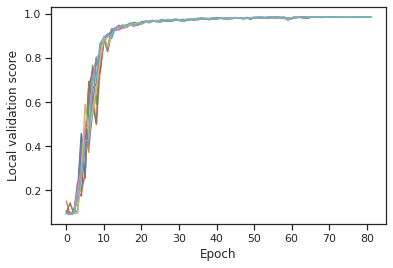

In [64]:

score_matrix_per_partner[score_matrix_per_partner == 0] = 'nan'

partner_idx = 0
plt.plot(score_matrix_per_partner[:, 0, :])
plt.xlabel("Epoch")
plt.ylabel("Local validation score")

(100, 2)


Text(0, 0.5, 'Global validation score')

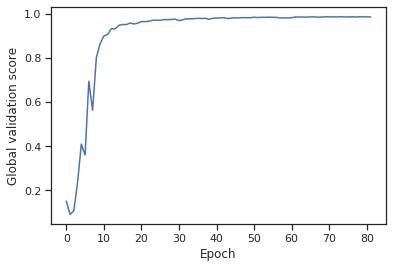

In [65]:
score_matrix_collective_models = loss_data["score_matrix_collective_models"]
print(score_matrix_collective_models.shape)
score_matrix_collective_models[score_matrix_collective_models == 0] = 'nan' # TODO don't init with zero

plt.plot(score_matrix_collective_models[:, 1])
plt.xlabel("Epoch")
plt.ylabel("Global validation score")


Text(0, 0.5, 'Global loss')

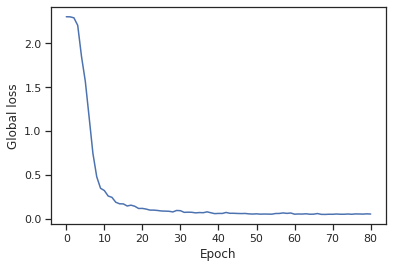

In [66]:
loss_collective_models = loss_data["loss_collective_models"]
loss_collective_models = loss_collective_models[1:] # TODO Why first loss is nan ?
plt.plot(np.arange(len(loss_collective_models)), loss_collective_models)
plt.xlabel("Epoch")
plt.ylabel("Global loss")

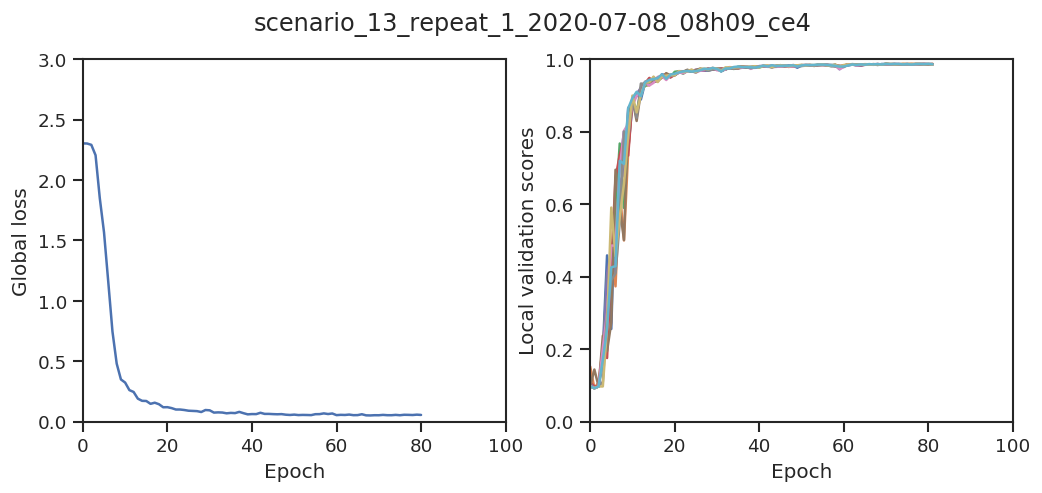

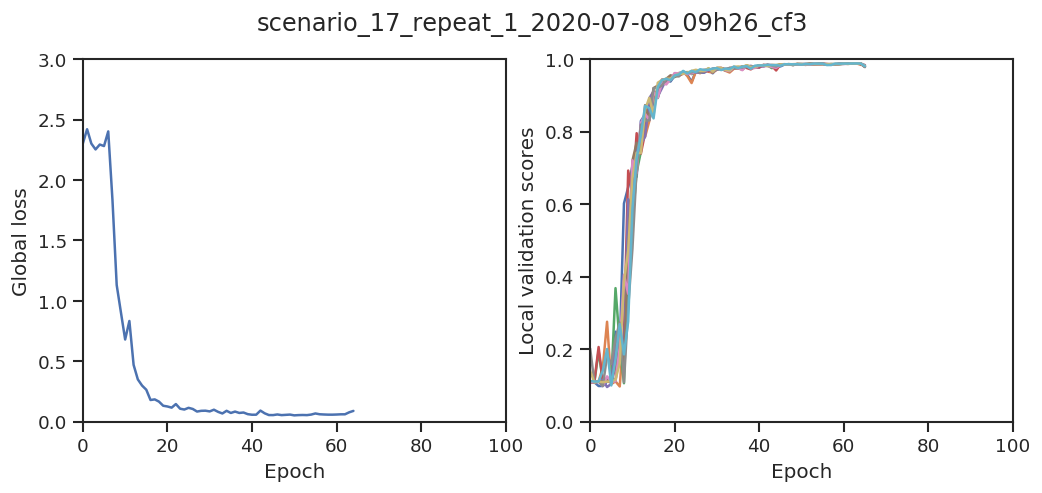

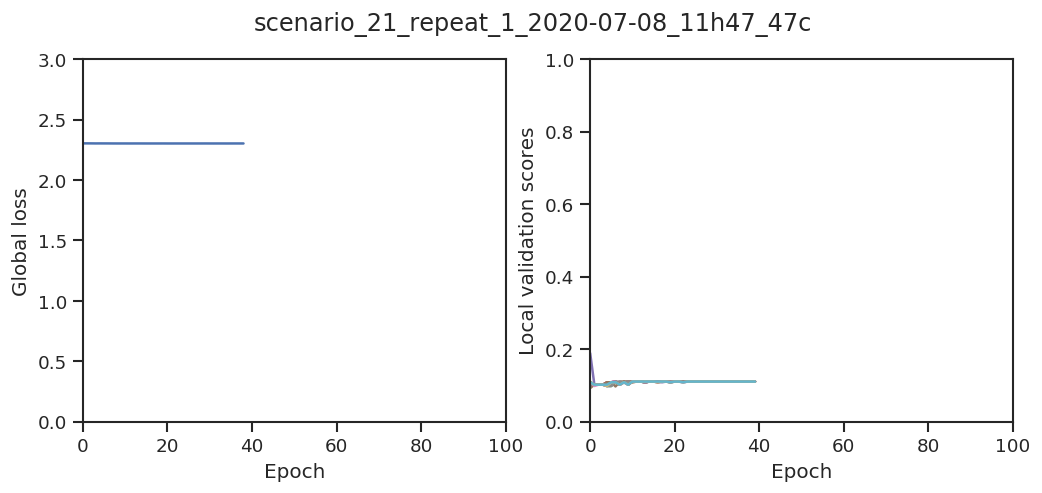

In [67]:
seq_scenario_names_list = df_seq.scenario_name

for scenario_name in df_seq.scenario_name:
    scenario_path = experiment_path / scenario_name
    history_data_path = scenario_path / "history_data.p"
    
    with open(history_data_path, 'rb') as f:
        loss_data = pickle.load(f)

    loss_collective_models = loss_data["loss_collective_models"]
    loss_collective_models =loss_collective_models[1:] # TODO Why first loss is nan ?

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120)
    fig.suptitle(scenario_name)

    ax1.plot(np.arange(len(loss_collective_models)), loss_collective_models)
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Global loss")
    ax1.set_ylim([0, 3])
    ax1.set_xlim([0, df_seq.epoch_count.max()])

    score_matrix_per_partner = loss_data["score_matrix_per_partner"]
    score_matrix_per_partner.shape
    score_matrix_per_partner[score_matrix_per_partner == 0] = 'nan'
    local_validation_score = score_matrix_per_partner[:, 0, :]
    
    ax2.plot(np.arange(len(local_validation_score)), local_validation_score)
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Local validation scores")
    ax2.set_ylim([0, 1])
    ax2.set_xlim([0, df_seq.epoch_count.max()])